# Hotel Demand Analysis
___

## Imports
- numpy to handle array functions
- pandas to manipulate data 
- matplotlib.pyplot for plotting data

In [488]:
# First, we'll import the needed libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pycountry
import country_converter as coco
import pycountry_convert as pc
import seaborn as sns

## Introduction

Describe project 

#### **Load the Data**

In [489]:
# Nest, we'll load the hotel demand dataset, which is in the "..\Module-2\" directory
df = pd.read_csv("hotel_bookings.csv") # the dataset is now a Pandas DataFrame
df.head(10) # print the first 10 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015


#### **Basic information about data**

In [490]:
df.shape      # Check dimensions

(119384, 32)

It appears that we have 32 columns of data and 119390 rows

In [491]:
df.dtypes # Check data type of each column

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [492]:
df.info() # Check the Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119384 entries, 0 to 119383
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119384 non-null  object 
 1   is_canceled                     119384 non-null  int64  
 2   lead_time                       119384 non-null  int64  
 3   arrival_date_year               119384 non-null  int64  
 4   arrival_date_month              119384 non-null  object 
 5   arrival_date_week_number        119384 non-null  int64  
 6   arrival_date_day_of_month       119384 non-null  int64  
 7   stays_in_weekend_nights         119384 non-null  int64  
 8   stays_in_week_nights            119384 non-null  int64  
 9   adults                          119384 non-null  int64  
 10  children                        119380 non-null  float64
 11  babies                          119384 non-null  int64  
 12  meal            

In [493]:
df.isna().sum() # Check for missing values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Clearly There are missing values from children, country, agent, and company columns!

In [494]:
df.describe() # Check statistical summary of numerical variables

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119384.000000,119384.000000,119384.000000,119384.000000,119384.000000,119384.000000,119384.000000,119384.000000,119380.000000,119384.000000,119384.000000,119384.000000,119384.000000,119384.000000,103044.000000,6797.000000,119384.000000,119384.000000,119384.000000,119384.000000
mean,0.370435,104.013511,2016.156529,27.165340,15.798206,0.927612,2.500343,1.856421,0.103895,0.007949,0.031914,0.087122,0.137104,0.221135,86.696411,189.266735,2.321266,101.830180,0.062521,0.571375
std,0.482923,106.864803,0.707477,13.604985,8.780841,0.998615,1.908313,0.579259,0.398571,0.097439,0.175771,0.844357,1.497474,0.652320,110.776777,131.655015,17.595155,50.536429,0.245297,0.792810
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.280000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### **Missing / Null values**

Dealing with missing values can be done by deleting, filling. However deleting some columns such as (agent,company,country) can impact our visulazation.

- Agent	ID of the travel agency that made the booking
- Company	ID of the company/entity that made the booking or responsible for paying the booking.
- Children		Number of children
- Country		Country of origin. 

In [495]:
df["agent"].fillna(0, inplace = True)
df["company"].fillna(0, inplace = True)
df["children"].fillna(0, inplace = True)
df["country"].fillna('No country', inplace = True)

In [496]:
df.isna().sum() # Re-Check for missing values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#### **Change the datatypes** 

It appears that children, agent, and company use float dtype which seems unnecessary and should be changed to int

In [497]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')


In [498]:
df.dtypes # Re-Check data type of each column

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#### **Duplicate values**

In [499]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,7/3/2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250,0,0,Transient,84.67,0,1,Check-Out,7/7/2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250,0,0,Transient,137.00,0,1,Check-Out,7/7/2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240,0,0,Transient,97.00,0,0,Canceled,7/1/2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240,0,0,Transient,109.80,0,3,Check-Out,7/8/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119343,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9,0,0,Transient,126.00,0,2,Check-Out,9/3/2017
119346,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,0,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119347,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,0,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119348,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9,0,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017


In [500]:
df.duplicated().sum()

31993

It can be noted that there is 31994 duplicated values therefore deleteing them should be sufficient

In [501]:
df.drop_duplicates(keep='first',inplace=True)

In [502]:
df.duplicated().sum() # Re-Check number of duplicates

0

#### **Clean Dirty Data** 

Improvemnts that I noticed with the data were:
- Countries names should be based on continents rather than countries shortcut
- Meals names should be complete and not only shortcuts

##### Continents names

In [503]:
# CONVERT ISO COUNTRY ALPHA3 TO COUNTRY NAME
def alpha3_to_country(country_alpha3):    
    country_alpha2 = pc.country_alpha3_to_country_alpha2(country_alpha3)
    country_name = pc.country_alpha2_to_country_name(country_alpha2,cn_name_format="default")
    return country_name

In [504]:
# CONVERT COUNTRY NAME TO CONTINENT 
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


In [505]:
# ADD CONTINENTS COL TO DF
def return_continents(countries):
    continents = []
    for c in df['country']:
        if c == 'No country':
            continents.append('No continent')
            continue
        country = alpha3_to_country(c.upper())
        continent = country_to_continent(country)
        continents.append(continent)
    return continents
df['continents'] = return_continents(df['country'])

##### Meal names

In [506]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [507]:
df['meal'].replace({'BB': 'Bed & Breakfast','FB' : 'Full board','HB' : 'Half board', 'SC' : 'No meal'}, inplace=True)

In [508]:
df['meal'].unique() # Re-Check that meals names changed

array(['Bed & Breakfast', 'Full board', 'Half board', 'No meal',
       'Undefined'], dtype=object)

#### **Plot the Data**

To plot the Data I used 3 plots, which are:
- **Time series analysis:** a plot that shows the number of each resevation in each month for each hotel(City, Resort).
- **Pie Chart:** a plot that shows the resevation number of each continets in each month for each hotel(City, Resort).
- **Bar Chart:** a plot that shows the cancellations rate % for each hotel(City, Resort).

#### Split the Data

In [509]:
# split the data into city and resort resevation and check that the customer checked-out (we don't want to have customers who cancelled or didn't show up)
df_city, df_resort = [x for _, x in df[df['reservation_status'] == 'Check-Out'].groupby(df['hotel'] == 'Resort Hotel')]

In [510]:
df_city.head() # Re-Check that the split is correct

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,continents
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,6,0,0,Transient,0.00,0,0,Check-Out,7/3/2015,Europe
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,1,0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015,Europe
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,1,0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015,Europe
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,1,0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015,Europe
40073,City Hotel,0,4,2015,July,27,3,0,2,1,...,1,0,0,Transient-Party,63.00,0,0,Check-Out,7/5/2015,Europe


In [511]:
df_resort.head() # Re-Check that the split is correct

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,continents
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,7/1/2015,Europe
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,7/1/2015,Europe
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,7/2/2015,Europe
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,7/2/2015,Europe
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,7/3/2015,Europe


#### Time series analysis

In [512]:
# Draw Plot
def plot_time_analysis(x1, y1, x2, y2):
    plt.style.use("seaborn-dark")
    fig, ax = plt.subplots(figsize=(18,6))
    ax.set_xlabel('Months')
    ax.set_ylabel('Resevation rate (%)')
    ax.set_title('Resevation Trends')
    sns.lineplot(x1, y1.values, label='City Hotel',marker="o")
    sns.lineplot(x1, y2.values, label='Resort Hotel',marker="o")
    plt.grid(True)
    plt.show()

In [513]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


In [514]:
sorted_months_city = df_city['arrival_date_month'].value_counts().reindex(new_order)
x1 = sorted_months_city.index
y1 = sorted_months_city/sorted_months_city.sum()*100

In [515]:
sorted_months_resort = df_resort['arrival_date_month'].value_counts().reindex(new_order)
x2 = sorted_months_resort.index
y2 = sorted_months_resort/sorted_months_resort.sum()*100

c:\Users\lalmutairi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\lalmutairi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


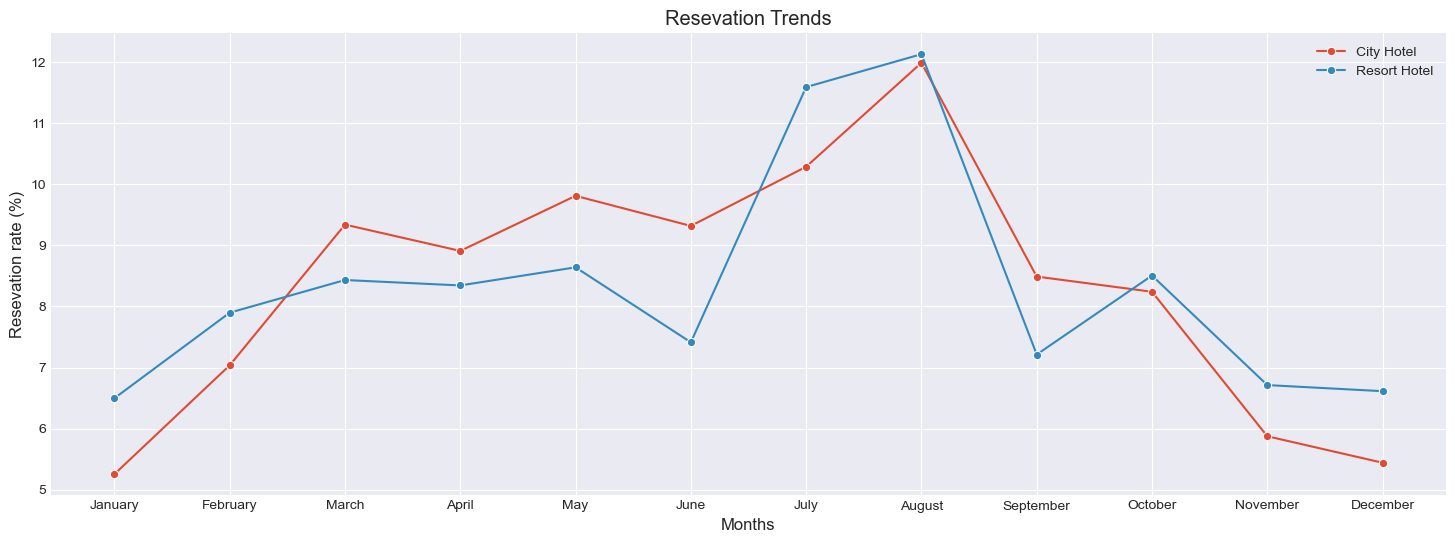

In [516]:
plot_time_analysis(x1, y1, x2, y2)

##### From the plot we can prove that the hotels have the highest number of reservations during their peak - high - season which is between June and the end of August. Therfore hotels shall excpet a high revenue during this season. 

#### Pie Chart

In [517]:
def plot_pie_chart(df):
    my_data = [
        df['continents'].value_counts()['Europe'],
        df['continents'].value_counts()['South America'],
        df['continents'].value_counts()['Africa'],
        df['continents'].value_counts()['Asia'],
        df['continents'].value_counts()['North America'],
        df['continents'].value_counts()['Oceania'],
        df['continents'].value_counts()['No continent'],        
    ]
    my_labels = 'Europe', 'South America', 'Africa', 'Asia', 'North America','Oceania', 'No continent'
    plt.figure(figsize=(10,8))
    plot = plt.pie(my_data, labels=my_labels,
    counterclock=False,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2'),
    labeldistance=1.05,
    # Distance of percent labels from the center
    pctdistance=0.6,
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
     textprops = dict(va="center",rotation_mode = 'anchor'))
    plt.title('Continents Resevation Rates %', fontdict={"fontsize":12},pad=20)
    plt.axis('equal')
    plt.show()

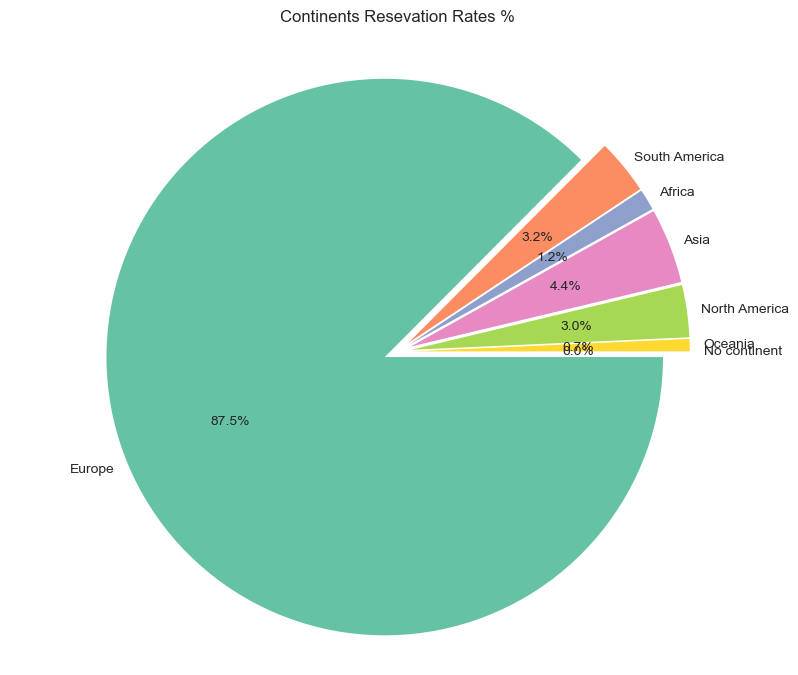

In [518]:
plot_pie_chart(df_city)

**##### From the plot we can notice that most city hotel guests are from europe while the least from Oceania. As a result can be due to location differences or lack of availability.**

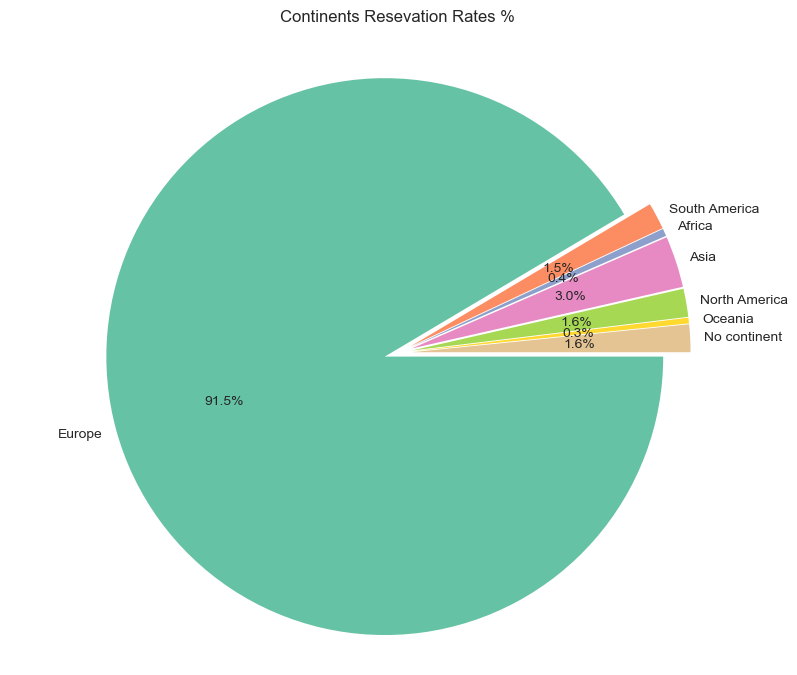

In [519]:
plot_pie_chart(df_resort)

**##### From the plot we can notice that most resort hotel guests are from europe while the least from Oceania/Africa. As a result can be due to location differences or lack of availability.**

#### Bar Chart

In [520]:
def plot_bar_chart(df):
    plt.style.use('ggplot')
    x = ['Avg. 2015', 'Avg. 2016', 'Avg. 2017']
    canceled_2015 = df.loc[df['arrival_date_year'] == 2015]
    canceled_2016 = df.loc[df['arrival_date_year'] == 2016]
    canceled_2017 = df.loc[df['arrival_date_year'] == 2017]
    avg = [np.average(canceled_2015['is_canceled']),
           np.average(canceled_2016['is_canceled']),
           np.average(canceled_2017['is_canceled'])]
    x_pos = [i for i, _ in enumerate(x)]
    plt.figure(figsize=(10,8))
    plt.bar(x_pos, avg)
    plt.xlabel("Year")
    plt.ylabel("Average cancelation rate %")
    plt.title("Cancelation Rate (%) of Resevations")

    plt.xticks(x_pos, x)

    plt.show()

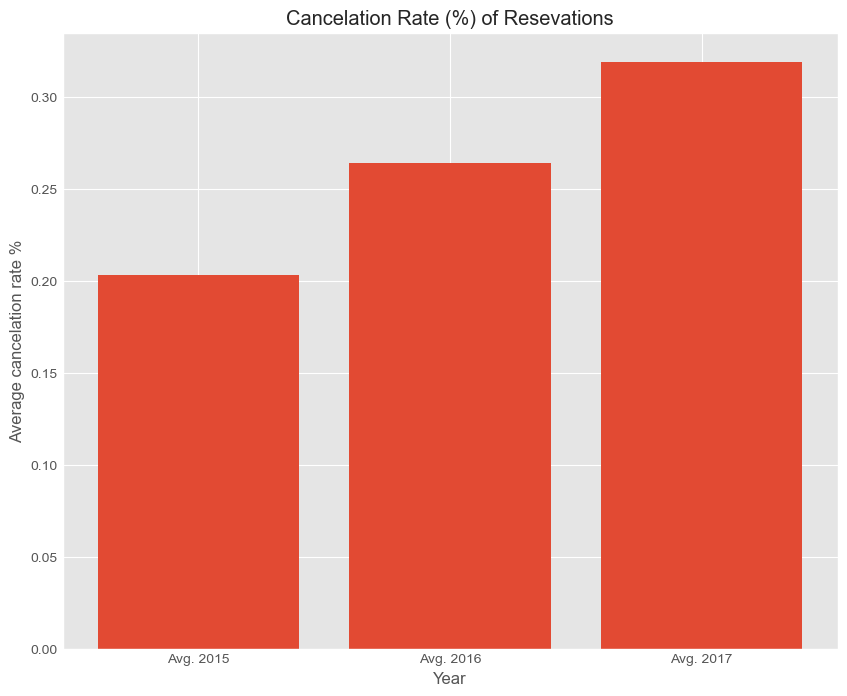

In [521]:
plot_bar_chart(df)

**#### From the plot we can notice that most cancelations came in 2017 year. It can be due to bad service or increase in prices or competition! **